In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, plot_confusion_matrix

import pickle

In [23]:
data = pd.read_csv("Iris.csv")

In [24]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [26]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [27]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [79]:
def preprocess_inputs(df):
  df = df.copy()
  #drop ID
  df = df.drop("Id", axis=1)
  #X and y
  X = df.drop('Species', axis=1)
  y = df['Species']
  #Split the data
  X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, shuffle=True, random_state=21)
  return X_train, X_test, y_train, y_test 

In [80]:
  X_train, X_test, y_train, y_test  = preprocess_inputs(data)

In [81]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

120
120
30
30


In [82]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
41,4.5,2.3,1.3,0.3
131,7.9,3.8,6.4,2.0
70,5.9,3.2,4.8,1.8
46,5.1,3.8,1.6,0.2
126,6.2,2.8,4.8,1.8
...,...,...,...,...
120,6.9,3.2,5.7,2.3
112,6.8,3.0,5.5,2.1
48,5.3,3.7,1.5,0.2
4,5.0,3.6,1.4,0.2


#Model Training

In [83]:
classifier = RandomForestClassifier()

In [84]:
model = classifier.fit(X_train, y_train)

# Evaluation

In [85]:
accuracy = model.score(X_test, y_test)
print("The accuracy is: ",accuracy*100, "%")

The accuracy is:  93.33333333333333 %


In [86]:
y_pred = model.predict(X_test)

In [87]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [88]:
clf = classification_report(y_test, y_pred)
print(clf)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.78      1.00      0.88         7

       accuracy                           0.93        30
      macro avg       0.93      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30



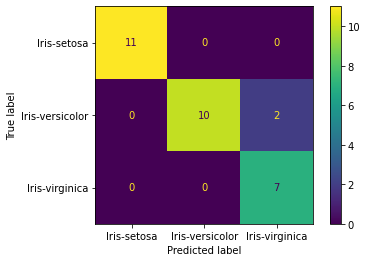

In [89]:
cm = plot_confusion_matrix(model, X_test, y_test, labels=model.classes_)

#Feature Impact using SHAP Values

In [90]:
!pip install shap

In [91]:
import shap

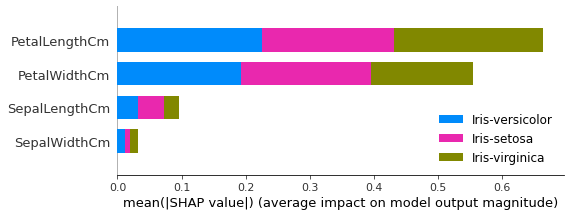

In [92]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names=model.classes_)

In [95]:
pickle.dump(model, open('model.pkl', 'wb'))